# SORA Getting Started

In [1]:
## SORA package
from sora import Occultation, Body, Star, LightCurve, Observer
from sora.prediction import prediction
from sora.extra import draw_ellipse

## Other main packages
from astropy.time import Time
import astropy.units as u

## Usual packages
import numpy as np
import matplotlib.pylab as pl
import os

SORA version: 0.2dev


**Before analysing stellar occultations data, let's predict them.**

To predict stellar occultation we needs the intended Solar System body ephemeris and a time window.

In [5]:
# First, let's consider an Solar System Body

chariklo = Body(name='Chariklo', 
                ephem=['input/bsp/Chariklo.bsp', 'input/bsp/de438_small.bsp'])

print(chariklo)

Obtaining data for Chariklo from SBDB
###############################################################################
                          10199 Chariklo (1997 CU26)                           
###############################################################################
Object Orbital Class: Centaur
Spectral Type:
    SMASS: D  [Reference: EAR-A-5-DDR-TAXONOMY-V4.0]
       Relatively featureless spectrum with very steep red slope.
Discovered 1997-Feb-15 by Spacewatch at Kitt Peak

Physical parameters:
Diameter:
    302 +/- 30 km
    Reference: Earth, Moon, and Planets, v. 89, Issue 1, p. 117-134 (2002), 
Rotation:
    7.004 +/- 0 h
    Reference: LCDB (Rev. 2020-October); Warner et al., 2009, [Result based on less than full coverage, so that the period may be wrong by 30 percent or so.]  REFERENCE LIST:[Fornasier, S.; Lazzaro, D.; Alvarez-Candal, A.; Snodgrass, C.; et   al. (2014) Astron. Astrophys. 568, L11.], [Leiva, R.; Sicardy, B.; Camargo, J.I.B.; Desmars, J.; et al. (2017)

In [6]:
pred = prediction(body=chariklo, time_beg='2017-06-20',time_end='2017-06-27',mag_lim=16)

pred

Ephemeris was split in 1 parts for better search of stars

Searching occultations in part 1/1
Generating Ephemeris between 2017-06-20 00:00:00.000 and 2017-06-26 23:59:00.000 ...
    5 Gaia-EDR3 stars downloaded
Identifying occultations ...

2 occultations found.


Epoch,ICRS Star Coord at Epoch,Geocentric Object Position,C/A,P/A,Vel,Dist,G,G*,long,loct,M-G-T,S-G-T,Gaia-EDR3 Source ID
,,,arcsec,deg,km / s,AU,mag,mag,deg,hh:mm,deg,deg,
object,object,object,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,int64
2017-06-21 09:57:43.420,18 55 36.17454 -31 31 19.03261,18 55 36.17500 -31 31 19.60516,0.573,179.41,-21.84,14.663,15.254,15.350,225,00:56,128,165,6760228702284187264
2017-06-22 21:18:48.200,18 55 15.65251 -31 31 21.67062,18 55 15.65249 -31 31 21.62190,0.049,359.72,-22.00,14.659,14.224,14.327,53,00:50,149,166,6760223758801661440


In [7]:
## ploting the occultation map

pred['2017-06-22 21:18'].plot_occ_map(nameimg='figures/pred_map')

figures/pred_map.png generated


<img src='figures/pred_map.png' style='width:600px;height:500px'/>

**Now, let's start instantiating the Occultation**

An occultation is defined by the occulting body, the occulted star, and the time of the occultation 

In [8]:
Occultation?

Init signature: Occultation(star, body=None, ephem=None, time=None)
Docstring:     
Does the reduction of the occultation
    
Init docstring:
Instantiates the Occultation object.

Parameters:
    star (Star, str): The coordinate of the star in the same reference frame as the ephemeris.
        It must be a Star object or a string with the coordinates of the object to search on
        Vizier (required).
    body* (Body, str): Object that will occult the star. It must be a Body object or its
        name to search in the Small Body Database.
    ephem* (Ephem): object ephemeris. It must be an Ephemeris object or a list .
    time (str, Time): Reference time of the occultation.
        Time does not need to be exact, but needs to be within approximately 50 minutes
        of the occultation closest approach to calculate occultation parameters (required).

* When instantiating with "body" and "ephem", the user may define the Occultation in 3 ways:
    - With "body" and "ephem".
    - Wit

In [9]:
star_occ = Star(coord='18 55 15.65250 -31 31 21.67051')
#star_occ = Star(code='6760223758801661440')

print(star_occ)


1 Gaia-EDR3 star found G=14.223702
star coordinate at J2016.0: RA=18h55m15.65210s +/- 0.0197 mas, DEC=-31d31m21.6676s +/- 0.018 mas

Gaia-EDR3 star Source ID: 6760223758801661440
ICRS star coordinate at J2016.0:
RA=18h55m15.65210s +/- 0.0197 mas, DEC=-31d31m21.6676s +/- 0.0180 mas
pmRA=3.556 +/- 0.025 mas/yr, pmDEC=-2.050 +/- 0.020 mas/yr
Plx=0.2121 +/- 0.0228 mas, Rad. Vel.=0.00 +/- 0.00 km/s 

Magnitudes: G: 14.224, B: 14.320, V: 13.530, R: 14.180, J: 12.395, H: 11.781,
            K: 11.627

Apparent diameter from Kervella et. al (2004):
    V: 0.0216 mas, B: 0.0216 mas
Apparent diameter from van Belle (1999):
    sg: B: 0.0238 mas, V: 0.0244 mas
    ms: B: 0.0261 mas, V: 0.0198 mas
    vs: B: 0.0350 mas, V: 0.0315 mas


In [10]:
occ = Occultation(star=star_occ, body=chariklo, time='2017-06-22 21:18')

print(occ)

Stellar occultation of star Gaia-DR2 6760223758801661440 by 10199 Chariklo (1997 CU26).

Geocentric Closest Approach: 0.049 arcsec
Instant of CA: 2017-06-22 21:18:48.200
Position Angle: 359.72 deg
Geocentric shadow velocity: -22.00 km / s
Sun-Geocenter-Target angle:  166.42 deg
Moon-Geocenter-Target angle: 149.11 deg


No observations reported

###############################################################################
                                     STAR                                      
###############################################################################
Gaia-EDR3 star Source ID: 6760223758801661440
ICRS star coordinate at J2016.0:
RA=18h55m15.65210s +/- 0.0197 mas, DEC=-31d31m21.6676s +/- 0.0180 mas
pmRA=3.556 +/- 0.025 mas/yr, pmDEC=-2.050 +/- 0.020 mas/yr
Plx=0.2121 +/- 0.0228 mas, Rad. Vel.=0.00 +/- 0.00 km/s 

Magnitudes: G: 14.224, B: 14.320, V: 13.530, R: 14.180, J: 12.395, H: 11.781,
            K: 11.627

Apparent diameter from Kervella et. al (2004):

**After that, we instantiate the observers and their light curves**

**Observers**

Now let's define our observers, they can be setted manually or from the MPC database

In [11]:
### User

out = Observer(name='Outeniqua'  ,lon='+16 49 17.710', lat='-21 17 58.170', height =1416)
ond = Observer(name='Onduruquea' ,lon='+15 59 33.750', lat='-21 36 26.040', height =1220)
tiv = Observer(name='Tivoli'     ,lon='+18 01 01.240', lat='-23 27 40.190', height =1344)
whc = Observer(name='Windhoek'   ,lon='+17 06 31.900', lat='-22 41 55.160', height =1902)
hak = Observer(name='Hakos'      ,lon='+16 21 41.320', lat='-23 14 11.040', height =1843)

print(tiv)

print('\n')

### MPC Database Search

opd = Observer(name='Observatorio Pico dos Dias',code='874')

print(opd)

Site: Tivoli
Geodetic coordinates: Lon: 18d01m01.24s, Lat: -23d27m40.19s, height: 1.344 km


Site: Observatorio Pico dos Dias
Geodetic coordinates: Lon: -45d34m57.54s, Lat: -22d32m07.7476s, height: 1.811 km


**Light Curves**

Now let's define our light curves, they can be instanciated from different way: 
- **(i)** Manually with arrays containing the flux and the times; 
- **(ii)** Read an ASCII file; 
- **(iii)** Already obtained times.

**Outeniqua (Namibia)**

In [20]:
out_lc = LightCurve(name='Outeniqua lc',file='input/lightcurves/lc_example.dat',
                    exptime=0.100, usecols=[0,1])

print(out_lc)


Light curve name: Outeniqua lc
Initial time: 2017-06-22 21:20:00.056 UTC
End time:     2017-06-22 21:23:19.958 UTC
Duration:     3.332 minutes
Time offset:  0.000 seconds

Exposure time:    0.1000 seconds
Cycle time:       0.1002 seconds
Num. data points: 2000


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




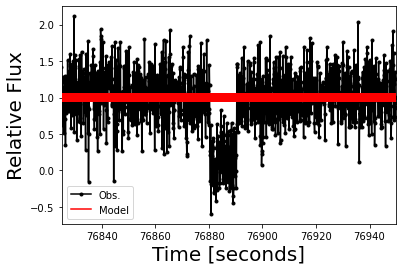

In [24]:
out_lc.plot_lc()
pl.xlim(76825,76950)
pl.show()

The light curve occultation model considers some physical parameters from the event:
- Distance between the geocenter and the occulting object (AU);
- Star diameter at the occulting object's distance (km);
- Nominal Velocity of the event (km/s);

These parameters can be automatic calculated as we connect the `LightCurve` and the `Observer` to the `Ocultation` Object.


In [25]:
occ.chords.add_chord(observer=out,lightcurve=out_lc)

print(out_lc)

Light curve name: Outeniqua lc
Initial time: 2017-06-22 21:20:00.056 UTC
End time:     2017-06-22 21:23:19.958 UTC
Duration:     3.332 minutes
Time offset:  0.000 seconds

Exposure time:    0.1000 seconds
Cycle time:       0.1002 seconds
Num. data points: 2000

Bandpass:             0.700 +/- 0.300 microns
Object Distance:      14.66 AU
Used shadow velocity: 22.004 km/s
Fresnel scale:        0.040 seconds or 0.87 km
Stellar size effect:  0.010 seconds or 0.23 km

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




/home/morgado/anaconda3/lib/python3.8/site-packages/sora/body/core.py:228: UserWarning: H and/or G is not defined for 10199 Chariklo. Searching into JPL Horizons service
  warnings.warn('H and/or G is not defined for {}. Searching into JPL Horizons service'.format(self.shortname))


Now, appart from the `LightCurve` Object having the needed parameters, also the `Occultation` object can acess the information from this `Chord`.

In [27]:
print(occ.chords)

-------------------------------------------------------------------------------
Site: Outeniqua
Geodetic coordinates: Lon: 16d49m17.71s, Lat: -21d17m58.17s, height: 1.416 km
Target altitude: 56.7 deg
Target azimuth:  115.3 deg

Light curve name: Outeniqua lc
Initial time: 2017-06-22 21:20:00.056 UTC
End time:     2017-06-22 21:23:19.958 UTC
Duration:     3.332 minutes
Time offset:  0.000 seconds

Exposure time:    0.1000 seconds
Cycle time:       0.1002 seconds
Num. data points: 2000

Bandpass:             0.700 +/- 0.300 microns
Object Distance:      14.66 AU
Used shadow velocity: 22.004 km/s
Fresnel scale:        0.040 seconds or 0.87 km
Stellar size effect:  0.010 seconds or 0.23 km

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




In [28]:
## We fit the modelled light curve, using chi square minimization and Monte Carlo procedures

out_lc.occ_lcfit?

Signature: out_lc.occ_lcfit(**kwargs)
Docstring:
Monte Carlo chi square fit for occultations lightcurve.

Parameters:
    tmin (int,float): Minimum time to consider in the fit procedure, in seconds
    tmax (int,float): Maximum time to consider in the fit procedure, in seconds
    flux_min (int,float): Bottom flux (only object). Default=0.0
    flux_max (int,float): Base flux (object plus star). Default=1.0
    immersion_time (int, float): Initial guess for immersion time, in seconds.
    emersion_time (int, float): Initial guess for emersion time, in seconds.
    opacity (int, float): Initial guess for opacity. Opaque=1.0, transparent=0.0. Default=1.0
    delta_t (int, float): Interval to fit immersion or emersion time
    dopacity (int, float): Interval to fit opacity. Default=0.
    sigma (int, float, array, 'auto'): Fluxes errors. If None it wil use the self.dflux.
        If 'auto' it calculate using the region outside the event.
    loop (int): Number of tests to be done. Default

In [29]:
## An automatic version can be used for cases where the occultation is obvious!!
## This process may take some minutes to run!!

out_chi2 = out_lc.occ_lcfit(loop=1000)
print('\n')
print(out_chi2)

LightCurve fit: |████████████████████████████████████████|  - 100% 


Minimum chi-square: 473.991
Number of fitted points: 496
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.959

immersion:
    1-sigma: 76880.322 +/- 0.029
    3-sigma: 76880.352 +/- 0.131

emersion:
    1-sigma: 76890.355 +/- 0.030
    3-sigma: 76890.349 +/- 0.106



In [ ]:
## However, we believe that the user should set the parameters by hand!!
## The complete description of each parameter can be seen at the function Docstring.
## This process may take some minutes to run!!

out_chi2 = out_lc.occ_lcfit(tmin=76875.0, tmax=76895.0, 
                            immersion_time=76880.3, 
                            emersion_time=76890.3, 
                            delta_t=0.2, loop=10000)
print('\n')
print(out_chi2)

**The user can visually acess the quality of the fit by ploting the** `ChiSquare` **object.**

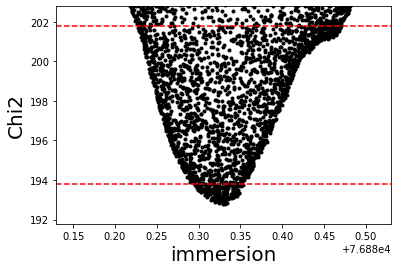

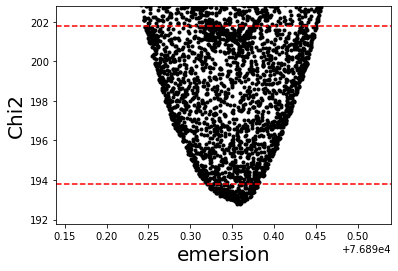

In [35]:
out_chi2.plot_chi2('immersion')
pl.xlim(76880.33 - 0.20, 76880.33 + 0.20)
pl.show()

out_chi2.plot_chi2('emersion')
pl.xlim(76890.34 - 0.20, 76890.34 + 0.20)
pl.show()


**Also, the user can visually acess the quality of the fit by ploting the** `LightCurve`.

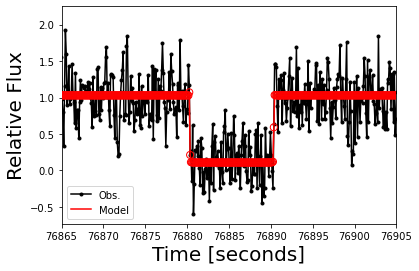

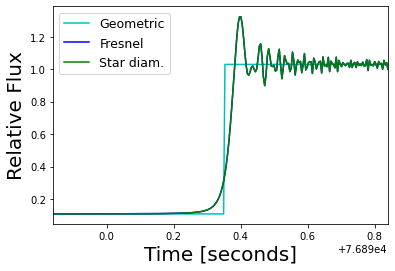

In [36]:
out_lc.plot_lc()
pl.xlim(76865, 76905)
pl.show()

out_lc.plot_model()
pl.xlim(76890.34-0.5, 76890.34+0.5)
pl.legend(ncol=1, fontsize=12.5, loc=2)
pl.show()

In [37]:
print(out_lc)

Light curve name: Outeniqua lc
Initial time: 2017-06-22 21:20:00.056 UTC
End time:     2017-06-22 21:23:19.958 UTC
Duration:     3.332 minutes
Time offset:  0.000 seconds

Exposure time:    0.1000 seconds
Cycle time:       0.1002 seconds
Num. data points: 2000

Bandpass:             0.700 +/- 0.300 microns
Object Distance:      14.66 AU
Used shadow velocity: 22.004 km/s
Fresnel scale:        0.040 seconds or 0.87 km
Stellar size effect:  0.010 seconds or 0.23 km
Inst. response:       0.100 seconds or 2.20 km
Dead time effect:     0.000 seconds or 0.00 km
Model resolution:     0.004 seconds or 0.09 km
Modelled baseflux:    1.029
Modelled bottomflux:  0.109
Light curve sigma:    0.307

Immersion time: 2017-06-22 21:21:20.324 UTC +/- 0.029 seconds
Emersion time:  2017-06-22 21:21:30.352 UTC +/- 0.029 seconds

Monte Carlo chi square fit.

Minimum chi-square: 192.784
Number of fitted points: 200
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.974

immersion:
    1

**Finally, the user can visually see the chord in the Sky-plane using the** `Chord` **Object.**

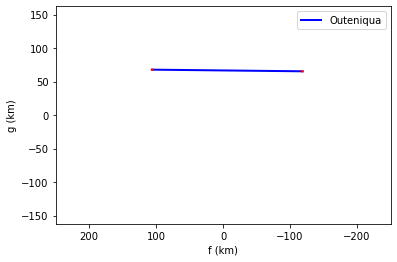

In [47]:
occ.chords.plot_chords(segment='positive', color='blue')
occ.chords.plot_chords(segment='error', color='red')
pl.legend()
pl.xlim(+250,-250)
pl.ylim(-250,+250)
pl.show()

**Now, let's add the other chords of this occultation.**

**Onduruquea (Namibia)**

In [59]:
ond_lc = LightCurve(name='Onduruquea lc',
                    initial_time='2017-06-22 21:11:52.175',
                    end_time ='2017-06-22 21:25:13.389',
                    immersion='2017-06-22 21:21:22.213', immersion_err=0.010,
                    emersion ='2017-06-22 21:21:33.824', emersion_err=0.011)

occ.chords.add_chord(observer=ond,lightcurve=ond_lc)

<Chord: Onduruquea>

In [62]:
print(occ.chords['Onduruquea'])

-------------------------------------------------------------------------------
Site: Onduruquea
Geodetic coordinates: Lon: 15d59m33.75s, Lat: -21d36m26.04s, height: 1.220 km
Target altitude: 56.1 deg
Target azimuth:  114.7 deg

Light curve name: Onduruquea lc
Initial time: 2017-06-22 21:11:52.175 UTC
End time:     2017-06-22 21:25:13.389 UTC
Duration:     13.354 minutes
Time offset:  0.000 seconds

Object LightCurve was not instantiated with time and flux.

Bandpass:             0.700 +/- 0.300 microns
Object Distance:      14.66 AU
Used shadow velocity: 22.004 km/s
Fresnel scale:        0.040 seconds or 0.87 km
Stellar size effect:  0.010 seconds or 0.23 km

Object LightCurve model was not fitted.

Immersion time: 2017-06-22 21:21:22.213 UTC +/- 0.010 seconds
Emersion time:  2017-06-22 21:21:33.824 UTC +/- 0.011 seconds




**Tivoli (Namibia)**

In [63]:
tiv_lc = LightCurve(name='Tivoli lc',
                    initial_time='2017-06-22 21:16:00.094',
                    end_time ='2017-06-22 21:28:00.018',
                    immersion='2017-06-22 21:21:15.628',immersion_err=0.011,
                    emersion ='2017-06-22 21:21:19.988',emersion_err=0.038)

occ.chords.add_chord(observer=tiv, lightcurve=tiv_lc)

<Chord: Tivoli>

**Windhoek (Namibia)**

When there is two chords at the same stations is important to define their names as different values

In [72]:
## C14
whc_c14_lc = LightCurve(name='Windhoek C14 lc',
                    initial_time='2017-06-22 21:12:48.250',
                    end_time ='2017-06-22 21:32:47.963',
                    immersion='2017-06-22 21:21:17.609',immersion_err=0.024,
                    emersion ='2017-06-22 21:21:27.564',emersion_err=0.026)

occ.chords.add_chord(name='Windhoek C14 lc', observer=whc, lightcurve=whc_c14_lc)

## D16
whc_d16_lc = LightCurve(name='Windhoek D16 lc',
                    initial_time='2017-06-22 21:20:01.884',
                    end_time ='2017-06-22 21:22:21.894',
                    immersion='2017-06-22 21:21:17.288',immersion_err=0.028,
                    emersion ='2017-06-22 21:21:27.228',emersion_err=0.034)

occ.chords.add_chord(name='Windhoek D16 lc', observer=whc, lightcurve=whc_d16_lc)


<Chord: Windhoek D16 lc>

**Hakos (Namibia)**

In [73]:
#Also negatives chords can be added
hak_lc = LightCurve(name='Hakos lc',
                    initial_time='2017-06-22 21:10:19.461',
                    end_time ='2017-06-22 21:30:19.345')

occ.chords.add_chord(observer=hak, lightcurve=hak_lc)

<Chord: Hakos>

**Chords display and ellipse fit**

After all light curves were instanciated and/or fitted, the next step is to plot the chords and fit the elipse. 

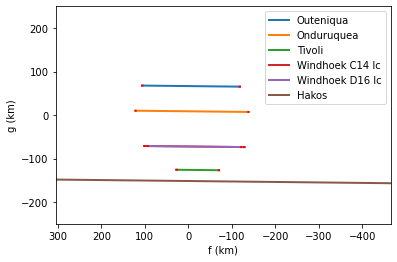

In [85]:
occ.chords.plot_chords()
occ.chords.plot_chords(segment='error', color='red')

pl.legend(loc=1)
pl.xlim(+170,-330)
pl.ylim(-250,+250)
pl.show()

In [86]:
## We can add known time offsets due to camera features

out_lc.dt = -0.150
ond_lc.dt = -0.190
tiv_lc.dt = -0.150
whc_c14_lc.dt = -0.375
whc_d16_lc.dt = +0.000
hak_lc.dt = -0.200

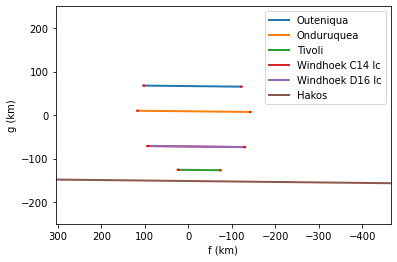

In [87]:
occ.chords.plot_chords()
occ.chords.plot_chords(segment='error', color='red')

pl.legend(loc=1)
pl.xlim(+170,-330)
pl.ylim(-250,+250)
pl.show()

**The next step is to fit an ellipse to the chords**

In [89]:
## We fit a ellipse using chi square minimization and Monte Carlo procedures, the 
## The complete description of each parameter can be seen at the function Docstring.

occ.fit_ellipse?

Signature: occ.fit_ellipse(**kwargs)
Docstring: <no docstring>
File:      ~/anaconda3/lib/python3.8/site-packages/sora/occultation/core.py
Type:      method


In [91]:
### This may take some minutes to run!!

ellipse_chi2  = occ.fit_ellipse(center_f=-15.046, center_g=-2.495, dcenter_f=3, dcenter_g=10, 
                                equatorial_radius=138, dequatorial_radius=3, oblateness=0.093, 
                                doblateness=0.02, position_angle=126, dposition_angle=10 ,loop=10000000,
                                dchi_min=10,number_chi=10000)


print(ellipse_chi2)

Ellipse fit: |████████████████████████████████████████|  - 100% 
Minimum chi-square: 11.851
Number of fitted points: 10
Number of fitted parameters: 5
Minimum chi-square per degree of freedom: 2.370

center_f:
    1-sigma: -13.601 +/- 0.121
    3-sigma: -13.597 +/- 0.426

center_g:
    1-sigma: -2.153 +/- 0.428
    3-sigma: -2.149 +/- 1.616

equatorial_radius:
    1-sigma: 138.623 +/- 0.416
    3-sigma: 138.646 +/- 1.422

oblateness:
    1-sigma: 0.086 +/- 0.003
    3-sigma: 0.086 +/- 0.010

position_angle:
    1-sigma: 124.083 +/- 1.560
    3-sigma: 124.085 +/- 5.321



**Similar, to the** `LightCurve` **fit, the user can visually acess the quality of the fit by ploting the** `ChiSquare` **object.**

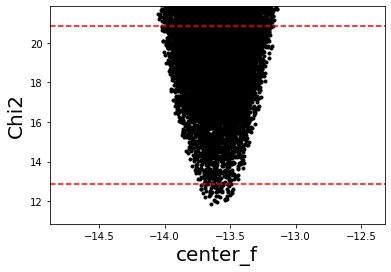

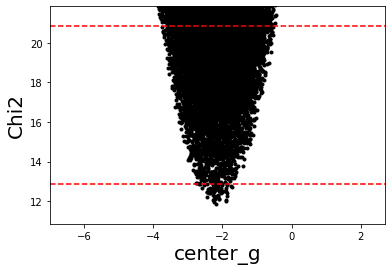

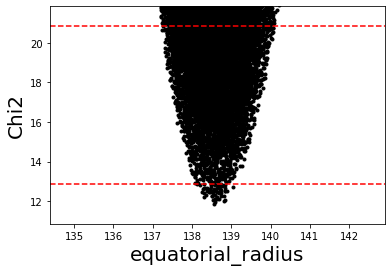

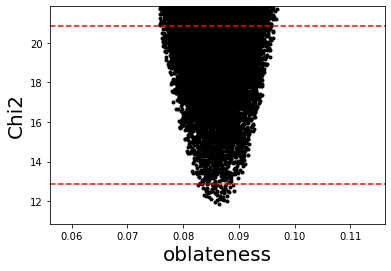

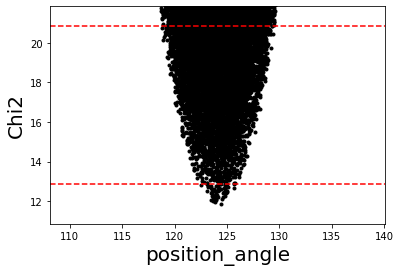

In [92]:
ellipse_chi2.plot_chi2()

**Also, the user can visually acess the quality of the fit by ploting the** `Chords` **and the fitted ellipses.**

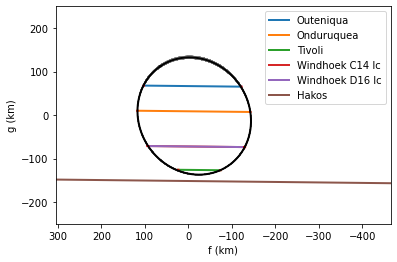

In [93]:
occ.chords.plot_chords()
occ.chords.plot_chords(segment='error', color='red')

#plotting the best fitted ellipse, in black
draw_ellipse(**ellipse_chi2.get_values())

# ploting all the ellipses within 3-sigma, in gray
draw_ellipse(**ellipse_chi2.get_values(sigma=3),alpha=1.0)

pl.legend(loc=1)
pl.xlim(+170,-330)
pl.ylim(-250,+250)
pl.show()

**The resulting values can be acessed from the Dictionaries** `Occultation.fitted_params` **and** `Occultation.chi2_params`

In [94]:
occ.fitted_params

{'equatorial_radius': [138.6232848330227, 0.4162124079667393],
 'center_f': [-13.601459232627045, 0.12146696644375687],
 'center_g': [-2.152507389823712, 0.4283400680278726],
 'oblateness': [0.08589676254685086, 0.003229533378556297],
 'position_angle': [124.08283560437482, 1.5600463424691995]}

In [95]:
occ.chi2_params

{'chord_name': ['Outeniqua_immersion',
  'Outeniqua_emersion',
  'Onduruquea_immersion',
  'Onduruquea_emersion',
  'Tivoli_immersion',
  'Tivoli_emersion',
  'Windhoek C14 lc_immersion',
  'Windhoek C14 lc_emersion',
  'Windhoek D16 lc_immersion',
  'Windhoek D16 lc_emersion'],
 'radial_dispersion': array([ 0.74529467, -0.77690769, -0.17079355,  0.06956694,  0.13450146,
        -2.00658745,  0.30491006, -0.17481192, -0.77393963,  0.55000408]),
 'position_angle': array([301.97543267,  58.91963672, 274.12616656,  84.68339654,
        205.81625429, 163.26596906, 238.47473808, 123.06908213,
        238.21279603, 122.85136951]),
 'radial_error': array([0.6424177 , 0.63840571, 0.22353223, 0.24588816, 0.24592875,
        0.84957552, 0.53652931, 0.58124301, 0.62595042, 0.7600887 ]),
 'chi2_min': 11.850833018839356,
 'nparam': 5,
 'npts': 10}

**Besides the size and shape of the body the astrometrical positions obtained using stellar occultation  is also a relevant result from the occultation and it has a precision that can be compared with space probes results (few km)**


In [96]:
occ.new_astrometric_position()

Ephemeris offset (km): X = -13.6 km +/- 0.1 km; Y = -2.2 km +/- 0.4 km
Ephemeris offset (mas): da_cos_dec = -1.279 +/- 0.011; d_dec = -0.202 +/- 0.040

Astrometric object position at time 2017-06-22 21:18:48.200
RA = 18 55 15.6523912 +/- 0.041 mas; DEC = -31 31 21.622100 +/- 0.050 mas


**After the instanciation of the** `Chords` **and the ellipse fit, the posfit occultation map can be plotted.**

In [98]:
occ.plot_occ_map(centermap_delta=[-3500,+400],zoom=20,nameimg='figures/map_posfit')

Projected shadow radius = 134.9 km
figures/map_posfit.png generated


<img src='figures/map_posfit.png' style='width:600px;height:500px'/>


**Finally, the log contains all the details**

In [97]:
print(occ)

Stellar occultation of star Gaia-DR2 6760223758801661440 by 10199 Chariklo (1997 CU26).

Geocentric Closest Approach: 0.049 arcsec
Instant of CA: 2017-06-22 21:18:48.200
Position Angle: 359.72 deg
Geocentric shadow velocity: -22.00 km / s
Sun-Geocenter-Target angle:  166.42 deg
Moon-Geocenter-Target angle: 149.11 deg


5 positive observations
1 negative observations

###############################################################################
                                     STAR                                      
###############################################################################
Gaia-EDR3 star Source ID: 6760223758801661440
ICRS star coordinate at J2016.0:
RA=18h55m15.65210s +/- 0.0197 mas, DEC=-31d31m21.6676s +/- 0.0180 mas
pmRA=3.556 +/- 0.025 mas/yr, pmDEC=-2.050 +/- 0.020 mas/yr
Plx=0.2121 +/- 0.0228 mas, Rad. Vel.=0.00 +/- 0.00 km/s 

Magnitudes: G: 14.224, B: 14.320, V: 13.530, R: 14.180, J: 12.395, H: 11.781,
            K: 11.627

Apparent diameter from 

**You can find more information about each Object Class at their specific Jupyter-Notebook.**

**The END**